# Problem Definition
- this is data sets collection from uber and lyft at United States in specific at Boston 
- Information of the boston is 24th-most populous city in the country at United States
- the goal of this data set is predict the price with specific feature 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.2)

In [2]:
df = pd.read_csv("rideshare_kaggle.csv")
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [3]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Divided the data set
- the data set has 57 column that very difficult to analysis all of this feature at same time
- then divided the data set to six sub data set to improve the quality of analysis and visualization 

In [5]:
one_df= df[df.columns[0:14]]
two_df= df[df.columns[14:24]]
three_df=df[df.columns[24:33]]
four_df=df[df.columns[33:42]]
five_df=df[df.columns[42:52]]
six_df=df[df.columns[52:]]


#### Working with first sub data set (Analysis)

##### Data Analysis Questions :
- what is number of demand lyft and uber ?
- what is the most source demand lyft and uber ?
- what the most destination the people go it ? 
- Any relation ship between the distance between ( source and destination) and price ? 
- Any relation ship between between name and price ? 
- Any relation ship between cab_type and price ? 
- what is the classes name of Lyft and Uber ?
- Any relation ship between product_id and price ? 
- What is most day has higher demand ?
- what is most hour has higher demand in week ?
- What is Worst hour in demond in week ?
- What is Worst day in demond in week ?
- What is most month has higher demand ?
- What is Worst month in demond in week ?

In [6]:
one_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44


In [7]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           693071 non-null  object 
 1   timestamp    693071 non-null  float64
 2   hour         693071 non-null  int64  
 3   day          693071 non-null  int64  
 4   month        693071 non-null  int64  
 5   datetime     693071 non-null  object 
 6   timezone     693071 non-null  object 
 7   source       693071 non-null  object 
 8   destination  693071 non-null  object 
 9   cab_type     693071 non-null  object 
 10  product_id   693071 non-null  object 
 11  name         693071 non-null  object 
 12  price        637976 non-null  float64
 13  distance     693071 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 74.0+ MB


In [8]:
one_df['datetime'].unique()

array(['2018-12-16 09:30:07', '2018-11-27 02:00:23',
       '2018-11-28 01:00:22', ..., '2018-12-17 07:15:07',
       '2018-11-30 05:23:02', '2018-11-29 17:38:01'], dtype=object)

In [9]:
one_df['datetime'] = pd.to_datetime(one_df['datetime'] , format='%Y-%m-%d %H:%M:%S' , errors = 'coerce' )  

<ipython-input-9-76b5a95dd018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['datetime'] = pd.to_datetime(one_df['datetime'] , format='%Y-%m-%d %H:%M:%S' , errors = 'coerce' )


In [10]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           693071 non-null  object        
 1   timestamp    693071 non-null  float64       
 2   hour         693071 non-null  int64         
 3   day          693071 non-null  int64         
 4   month        693071 non-null  int64         
 5   datetime     693071 non-null  datetime64[ns]
 6   timezone     693071 non-null  object        
 7   source       693071 non-null  object        
 8   destination  693071 non-null  object        
 9   cab_type     693071 non-null  object        
 10  product_id   693071 non-null  object        
 11  name         693071 non-null  object        
 12  price        637976 non-null  float64       
 13  distance     693071 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 74.0+ MB


In [11]:
one_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44


###### what is number of demand lyft and uber ?

In [12]:
one_df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

###### what is the most source demand lyft and uber ?

In [13]:
print("the most source demand lyft is :")
one_df[one_df["cab_type"] == 'Lyft']['source'].value_counts().head(1)

the most source demand lyft is :


Financial District    26237
Name: source, dtype: int64

In [14]:
print("the most source demand  Uber is :")
one_df[one_df["cab_type"] == 'Uber']['source'].value_counts().head(1)

the most source demand  Uber is :


Financial District    32620
Name: source, dtype: int64

###### what the most destination the people go it ? 

In [15]:
one_df['destination'].value_counts().head(1)

Financial District    58851
Name: destination, dtype: int64

###### Any relation ship between the distance between ( source and destination) and price ?

In [16]:
one_df[["distance" , 'price']].describe()

,distance,price
count,693071.000000,637976.000000
mean,2.189430,16.545125
std,1.138937,9.324359
min,0.020000,2.500000
25%,1.280000,9.000000
50%,2.160000,13.500000
75%,2.920000,22.500000
max,7.860000,97.500000


###### Any relation ship between  between name and price ? 


In [17]:
one_df[one_df['name'] == 'UberXL' ]['price'].describe()

count    55096.000000
mean        15.678144
std          4.523876
min          8.000000
25%         12.500000
50%         15.000000
75%         17.500000
max         76.000000
Name: price, dtype: float64

In [18]:
one_df[one_df['name'] == 'Black SUV' ]['price'].describe()

count    55096.000000
mean        30.286763
std          4.836097
min         23.000000
25%         27.000000
50%         28.500000
75%         32.500000
max         89.500000
Name: price, dtype: float64

In [19]:
one_df[one_df['name'] == 'WAV' ]['price'].describe()

count    55096.000000
mean         9.765019
std          2.465085
min          6.000000
25%          8.000000
50%          9.500000
75%         10.500000
max         44.000000
Name: price, dtype: float64

In [20]:
one_df[one_df['name'] == 'Taxi' ]['price'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64

In [21]:
one_df[one_df['name'] == "Taxi"]['price']

18       NaN
31       NaN
40       NaN
60       NaN
69       NaN
          ..
693025   NaN
693047   NaN
693049   NaN
693060   NaN
693068   NaN
Name: price, Length: 55095, dtype: float64

In [22]:
one_df['name'].value_counts()

UberXL          55096
Black SUV       55096
WAV             55096
Taxi            55095
Black           55095
UberX           55094
UberPool        55091
Lyft XL         51235
Lux Black       51235
Lyft            51235
Lux             51235
Lux Black XL    51235
Shared          51233
Name: name, dtype: int64

In [23]:
one_df[one_df['name'] == 'Black' ]['price'].describe()

count    55095.000000
mean        20.523786
std          4.952030
min         13.500000
25%         16.000000
50%         19.500000
75%         23.500000
max         68.500000
Name: price, dtype: float64

In [24]:
one_df[one_df['name'] == 'UberX' ]['price'].describe()

count    55094.000000
mean         9.765074
std          2.465101
min          6.000000
25%          8.000000
50%          9.500000
75%         10.500000
max         44.000000
Name: price, dtype: float64

In [25]:
one_df[one_df['name'] == 'UberPool' ]['price'].describe()

count    55091.000000
mean         8.752500
std          2.106251
min          4.500000
25%          7.500000
50%          8.500000
75%         10.000000
max         42.500000
Name: price, dtype: float64

In [26]:
one_df[one_df['name'] == 'Lyft' ]['price'].describe()

count    51235.000000
mean         9.610885
std          2.530305
min          5.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         38.500000
Name: price, dtype: float64

In [27]:
one_df[one_df['name'] == 'Lux' ]['price'].describe()

count    51235.000000
mean        17.771240
std          5.291983
min         10.500000
25%         13.500000
50%         16.500000
75%         19.500000
max         55.000000
Name: price, dtype: float64

In [28]:
one_df[one_df['name'] == 'Lux Black XL' ]['price'].describe()

count    51235.000000
mean        32.324086
std          7.181094
min         26.000000
25%         27.500000
50%         30.000000
75%         34.000000
max         97.500000
Name: price, dtype: float64

In [29]:
one_df[one_df['name'] == 'Lyft XL' ]['price'].describe()

count    51235.000000
mean        15.309363
std          4.555513
min          9.000000
25%         11.000000
50%         13.500000
75%         16.500000
max         65.000000
Name: price, dtype: float64

In [30]:
one_df[one_df['name'] == 'Lux Black' ]['price'].describe()

count    51235.000000
mean        23.062468
std          6.472883
min         16.500000
25%         16.500000
50%         22.500000
75%         26.000000
max         75.000000
Name: price, dtype: float64

In [31]:
one_df[one_df['name'] == 'Shared' ]['price'].describe()

count    51233.000000
mean         6.029893
std          2.107730
min          2.500000
25%          5.000000
50%          7.000000
75%          7.000000
max         22.500000
Name: price, dtype: float64

- the relation ship between the name of class and price directly proportional from higher to lower :
 * Lux Black XL 
 * Black SVV 
 * Lux Black 
 * Black
 * Lux
 * Uber XL
 * Lyft XL
 * WAV and Uber X
 * Lyft
 * Uber Pool
 * Shared 
 

In [32]:
one_df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [33]:
one_df[one_df['cab_type'] == 'Uber' ]['price'].describe()

count    330568.000000
mean         15.795343
std           8.560300
min           4.500000
25%           9.000000
50%          12.500000
75%          21.500000
max          89.500000
Name: price, dtype: float64

In [34]:
one_df[one_df['cab_type'] == 'Lyft' ]['price'].describe()

count    307408.000000
mean         17.351396
std          10.019171
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

-- the relation ship between class Lyft higher than Uber between the price

###### what is the classes name of Lyft and Uber ?

In [35]:
one_df[one_df['cab_type'] == 'Lyft' ]['name'].value_counts()

Lux             51235
Lyft XL         51235
Lux Black XL    51235
Lux Black       51235
Lyft            51235
Shared          51233
Name: name, dtype: int64

In [36]:
one_df[one_df['cab_type'] == 'Uber' ]['name'].value_counts()

UberXL       55096
Black SUV    55096
WAV          55096
Taxi         55095
Black        55095
UberX        55094
UberPool     55091
Name: name, dtype: int64

###### Any relation ship between  product_id and price ? 

In [37]:
one_df['product_id'].value_counts()

9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft_plus                               51235
lyft_lux                                51235
lyft_luxsuv                             51235
lyft                                    51235
lyft_line                               51233
Name: product_id, dtype: int64

In [38]:
one_df[one_df['product_id'] == 'lyft']['price'].describe()

count    51235.000000
mean         9.610885
std          2.530305
min          5.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         38.500000
Name: price, dtype: float64

In [39]:
one_df[one_df['product_id'] == 'lyft_lux']['price'].describe()

count    51235.000000
mean        23.062468
std          6.472883
min         16.500000
25%         16.500000
50%         22.500000
75%         26.000000
max         75.000000
Name: price, dtype: float64

In [40]:
one_df[one_df['product_id'] == 'lyft_luxsuv']['price'].describe()

count    51235.000000
mean        32.324086
std          7.181094
min         26.000000
25%         27.500000
50%         30.000000
75%         34.000000
max         97.500000
Name: price, dtype: float64

In [41]:
one_df[one_df['product_id'] == 'lyft_plus']['price'].describe()

count    51235.000000
mean        15.309363
std          4.555513
min          9.000000
25%         11.000000
50%         13.500000
75%         16.500000
max         65.000000
Name: price, dtype: float64

In [42]:
one_df[one_df['product_id'] == 'lyft_premier']['price'].describe()

count    51235.000000
mean        17.771240
std          5.291983
min         10.500000
25%         13.500000
50%         16.500000
75%         19.500000
max         55.000000
Name: price, dtype: float64

In [43]:
one_df[one_df['product_id'] == 'lyft_line']['price'].describe()

count    51233.000000
mean         6.029893
std          2.107730
min          2.500000
25%          5.000000
50%          7.000000
75%          7.000000
max         22.500000
Name: price, dtype: float64

In [44]:
one_df[one_df['product_id'] == '6f72dfc5-27f1-42e8-84db-ccc7a75f6969']['price'].describe()

count    55096.000000
mean        15.678144
std          4.523876
min          8.000000
25%         12.500000
50%         15.000000
75%         17.500000
max         76.000000
Name: price, dtype: float64

In [45]:
one_df[one_df['product_id'] == '6d318bcc-22a3-4af6-bddd-b409bfce1546']['price'].describe()

count    55096.000000
mean        30.286763
std          4.836097
min         23.000000
25%         27.000000
50%         28.500000
75%         32.500000
max         89.500000
Name: price, dtype: float64

In [46]:
one_df[one_df['product_id'] == '9a0e7b09-b92b-4c41-9779-2ad22b4d779d']['price'].describe()

count    55096.000000
mean         9.765019
std          2.465085
min          6.000000
25%          8.000000
50%          9.500000
75%         10.500000
max         44.000000
Name: price, dtype: float64

In [47]:
one_df[one_df['product_id'] == '6c84fd89-3f11-4782-9b50-97c468b19529']['price'].describe()

count    55095.000000
mean        20.523786
std          4.952030
min         13.500000
25%         16.000000
50%         19.500000
75%         23.500000
max         68.500000
Name: price, dtype: float64

In [48]:
one_df[one_df['product_id'] == '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']['price'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64

In [49]:
one_df[one_df['product_id'] == '55c66225-fbe7-4fd5-9072-eab1ece5e23e']['price'].describe()

count    55094.000000
mean         9.765074
std          2.465101
min          6.000000
25%          8.000000
50%          9.500000
75%         10.500000
max         44.000000
Name: price, dtype: float64

In [50]:
one_df[one_df['product_id'] == '997acbb5-e102-41e1-b155-9df7de0a73f2']['price'].describe()

count    55091.000000
mean         8.752500
std          2.106251
min          4.500000
25%          7.500000
50%          8.500000
75%         10.000000
max         42.500000
Name: price, dtype: float64

In [51]:
for col in one_df['product_id'].value_counts().index:
    print(f'Column name is {col}')
    print(one_df[one_df['product_id'] == col ]['price'].mean())
    print("_"*60
         )

Column name is 9a0e7b09-b92b-4c41-9779-2ad22b4d779d
9.765019239146218
____________________________________________________________
Column name is 6d318bcc-22a3-4af6-bddd-b409bfce1546
30.286763104399594
____________________________________________________________
Column name is 6f72dfc5-27f1-42e8-84db-ccc7a75f6969
15.678143603891389
____________________________________________________________
Column name is 6c84fd89-3f11-4782-9b50-97c468b19529
20.523786187494327
____________________________________________________________
Column name is 8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a
nan
____________________________________________________________
Column name is 55c66225-fbe7-4fd5-9072-eab1ece5e23e
9.765074236758993
____________________________________________________________
Column name is 997acbb5-e102-41e1-b155-9df7de0a73f2
8.752500408415168
____________________________________________________________
Column name is lyft_premier
17.771240363033083
_______________________________________________

-- Relation between product id and price from higer to lower  
    * lyft_luxsuv
    * 6d318bcc-22a3-4af6-bddd-b409bfce1546
    * lyft_lux
    * 6c84fd89-3f11-4782-9b50-97c468b19529
    * lyft_premier
    * 6f72dfc5-27f1-42e8-84db-ccc7a75f6969
    * lyft_plus
    * 55c66225-fbe7-4fd5-9072-eab1ece5e23e  and 9a0e7b09-b92b-4c41-9779-2ad22b4d779d
    * 997acbb5-e102-41e1-b155-9df7de0a73f2
    * lyft_line
    * 8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a

###### What is most day has higher demand ?

In [52]:
one_df['year'] = one_df['datetime'].dt.year

<ipython-input-52-dde1f02b1e35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['year'] = one_df['datetime'].dt.year


In [53]:
one_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,year
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,2018
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,2018
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,2018
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,2018
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,2018


In [54]:
one_df['year'].value_counts()

2018    693071
Name: year, dtype: int64

In [55]:
one_df[one_df['price'] == one_df['price'].max()]['day']

597071    2
Name: day, dtype: int64

###### what is most hour has higher demand in week ?


In [56]:
one_df[one_df['price'] == one_df['price'].max()]['hour']

597071    1
Name: hour, dtype: int64

###### What is most month has higher demand ?

In [57]:
one_df[one_df['price'] == one_df['price'].max()]['month']

597071    12
Name: month, dtype: int64

###### What is Worst hour in demond in week ?

In [58]:
one_df['week'] = one_df['datetime'].dt.week

<ipython-input-58-a2e62ff75ea3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['week'] = one_df['datetime'].dt.week


In [59]:
one_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,year,week
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,2018,50
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,2018,48
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,2018,48
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,2018,48
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,2018,48


In [60]:
one_df['week'].value_counts()

48    376625
50    176088
51     81120
49     59238
Name: week, dtype: int64

In [61]:
one_df[one_df['price'] == one_df['price'].min()][['hour' , 'week']]

,hour,week
5901,23,48
7370,11,51
8623,21,48
16675,6,48
17032,2,48
...,...,...
677015,6,51
679085,7,49
679217,20,48
679502,3,48


###### What is Worst day in demond in week ? 

 

In [62]:
one_df[one_df['price'] == one_df['price'].min()][['day' , 'week']]

,day,week
5901,28,48
7370,18,51
8623,28,48
16675,27,48
17032,29,48
...,...,...
677015,18,51
679085,3,49
679217,27,48
679502,27,48


###### What is Worst month in demond in week ?

In [63]:
one_df[one_df['price'] == one_df['price'].min()][['month' , 'week']]

,month,week
5901,11,48
7370,12,51
8623,11,48
16675,11,48
17032,11,48
...,...,...
677015,12,51
679085,12,49
679217,11,48
679502,11,48


##### Data visualization  Numerical Plots 

In [64]:
one_df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'year', 'week'],
      dtype='object')

In [65]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           693071 non-null  object        
 1   timestamp    693071 non-null  float64       
 2   hour         693071 non-null  int64         
 3   day          693071 non-null  int64         
 4   month        693071 non-null  int64         
 5   datetime     693071 non-null  datetime64[ns]
 6   timezone     693071 non-null  object        
 7   source       693071 non-null  object        
 8   destination  693071 non-null  object        
 9   cab_type     693071 non-null  object        
 10  product_id   693071 non-null  object        
 11  name         693071 non-null  object        
 12  price        637976 non-null  float64       
 13  distance     693071 non-null  float64       
 14  year         693071 non-null  int64         
 15  week         693071 non-null  int6

In [66]:
Numerical_feature = ['timestamp','hour' , 'day','month','price']
Categorical_feature = ['timezone','source','destination','cab_type','product_id','name']

##### Data visualization  Numerical Plots Univariate

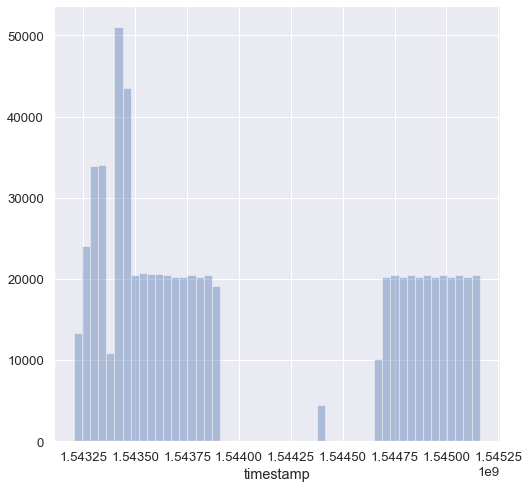

In [67]:
sns.distplot(one_df[Numerical_feature[0]] , kde=False )

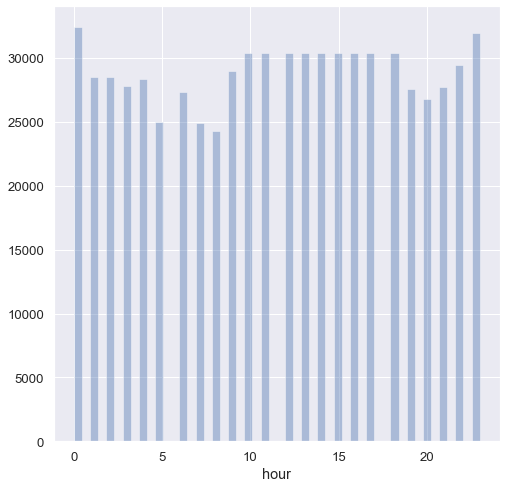

In [68]:
sns.distplot(one_df[Numerical_feature[1]] , kde=False )

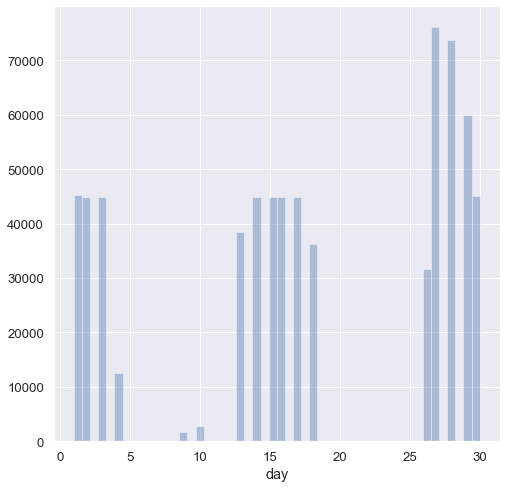

In [69]:
sns.distplot(one_df[Numerical_feature[2]] , kde=False )

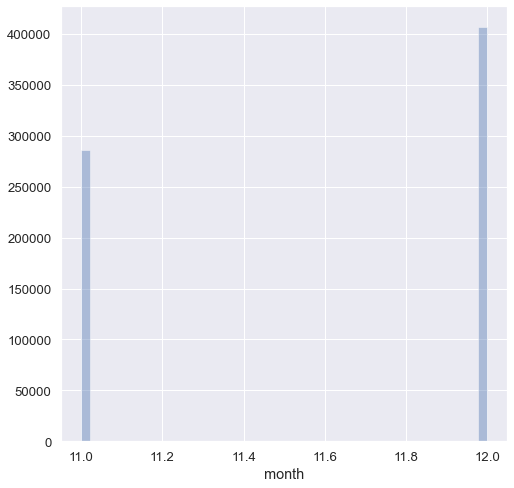

In [70]:
sns.distplot(one_df[Numerical_feature[3]] , kde=False )

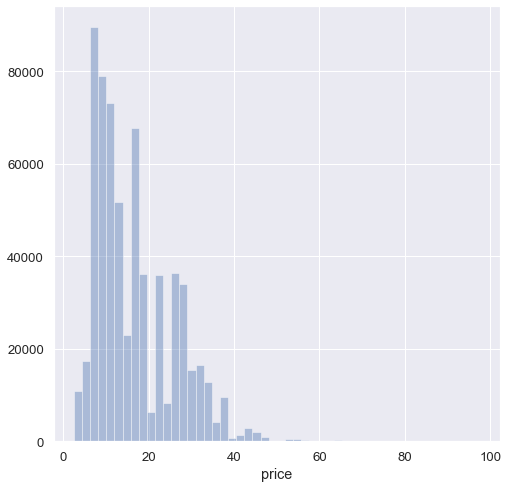

In [71]:
sns.distplot(one_df[Numerical_feature[4]] , kde=False )

##### Data visualization  Numerical Plots BIivariate


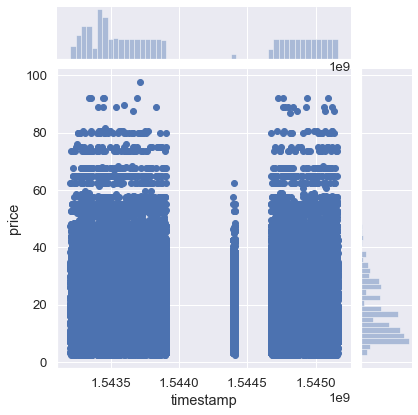

In [72]:
sns.jointplot(data= one_df , x=Numerical_feature[0] , y='price' )

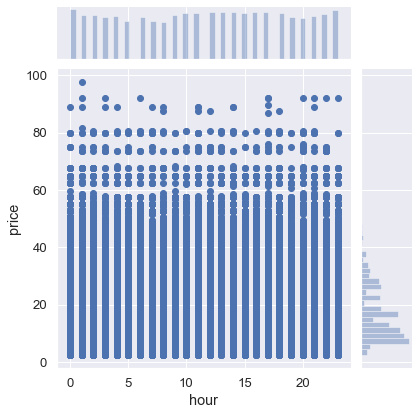

In [73]:
sns.jointplot(data= one_df , x=Numerical_feature[1] , y='price' )

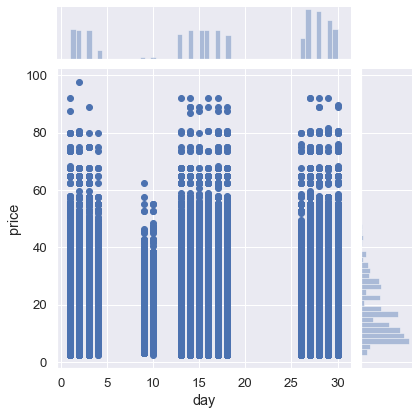

In [74]:
sns.jointplot(data= one_df , x=Numerical_feature[2] , y='price' )

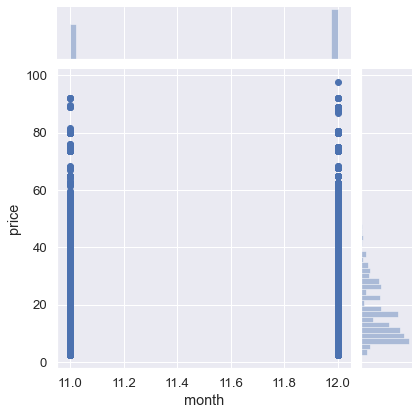

In [75]:
sns.jointplot(data= one_df , x=Numerical_feature[3] , y='price' )

##### Data visualization  Categorical Plots Univariate

In [76]:
Categorical_feature

['timezone', 'source', 'destination', 'cab_type', 'product_id', 'name']

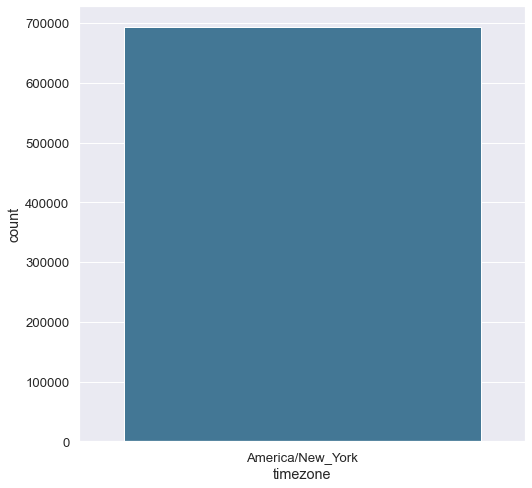

In [77]:
sns.countplot(one_df[Categorical_feature[0]] , palette='mako')

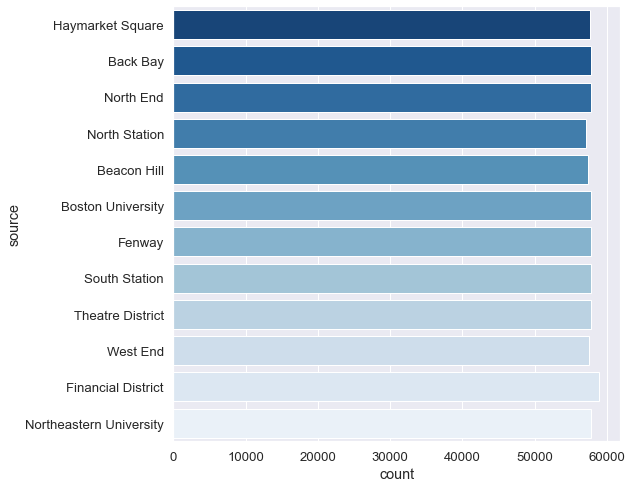

In [78]:
sns.countplot(y=one_df[Categorical_feature[1]] , palette='Blues_r')

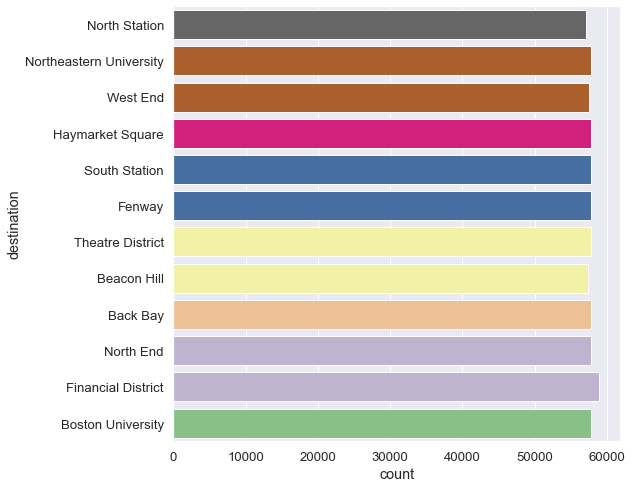

In [79]:
sns.countplot(y=one_df[Categorical_feature[2]] , palette='Accent_r')

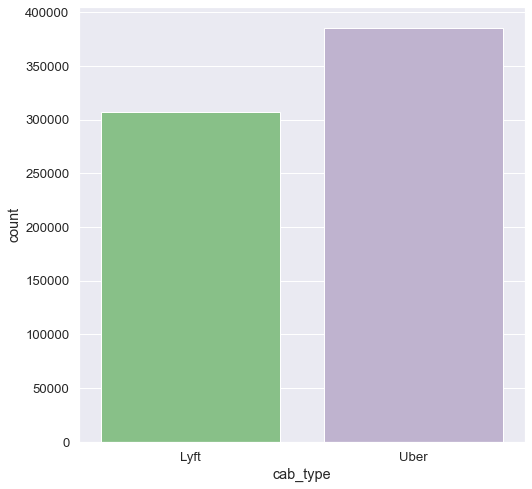

In [80]:
sns.countplot(one_df[Categorical_feature[3]] , palette='Accent')

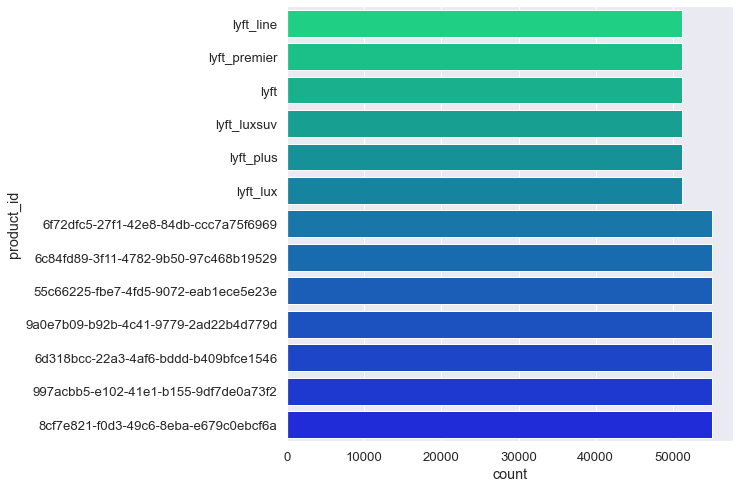

In [81]:
sns.countplot(y=one_df[Categorical_feature[4]] , palette='winter_r')

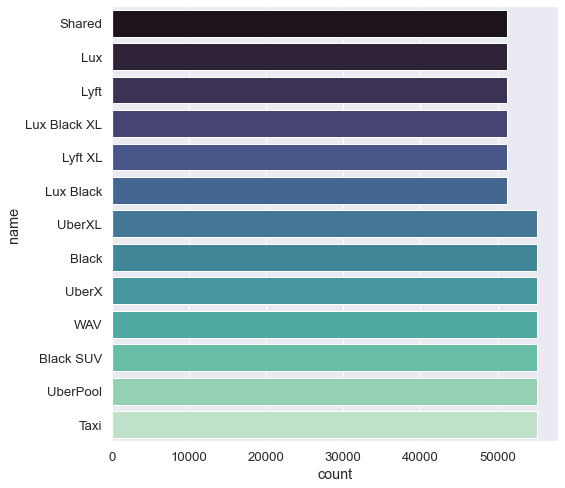

In [82]:
sns.countplot(y=one_df[Categorical_feature[5]] , palette='mako')

##### Data visualization  Categorical Plots Biivariate


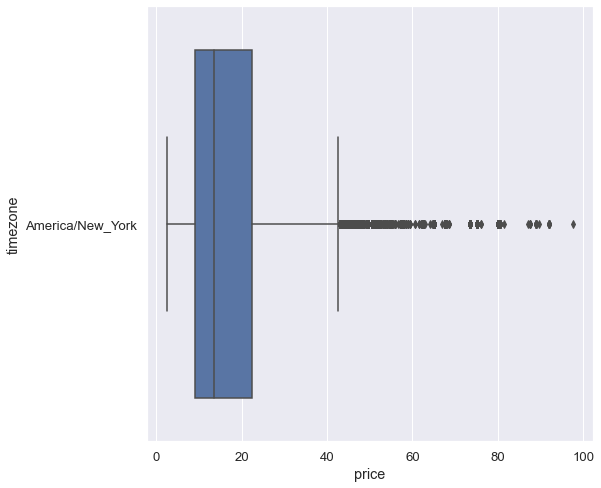

In [83]:
sns.boxplot(data=one_df , x='price' , y=Categorical_feature[0] , )

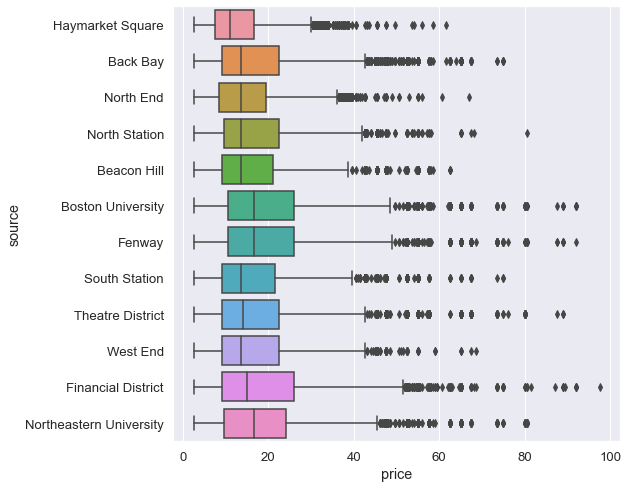

In [84]:
sns.boxplot(data=one_df , x='price' , y=Categorical_feature[1] )

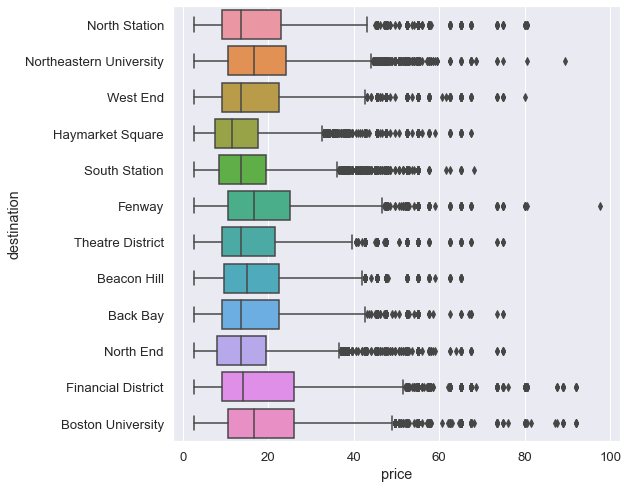

In [85]:
sns.boxplot(data=one_df , x='price' , y=Categorical_feature[2] )

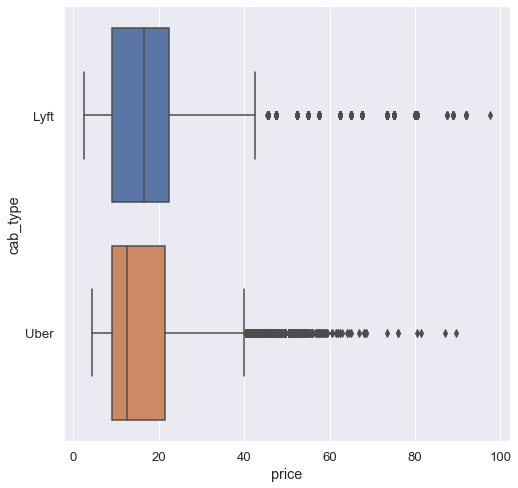

In [86]:
sns.boxplot(data=one_df , x='price' , y=Categorical_feature[3] )

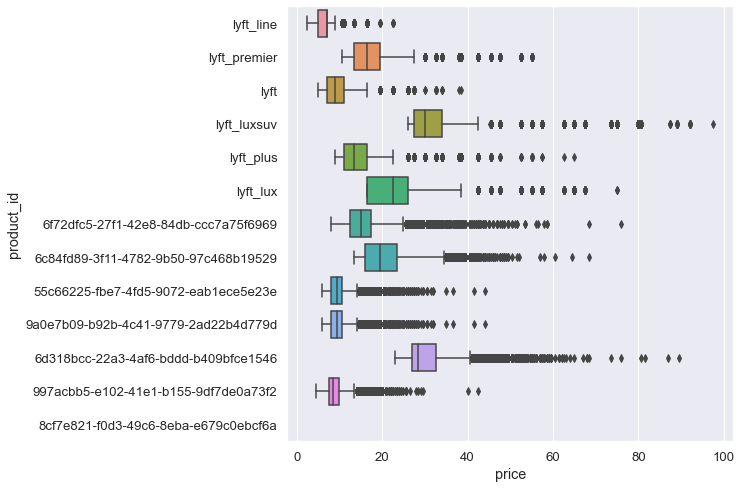

In [87]:
sns.boxplot(data=one_df , x='price' , y=Categorical_feature[4] )

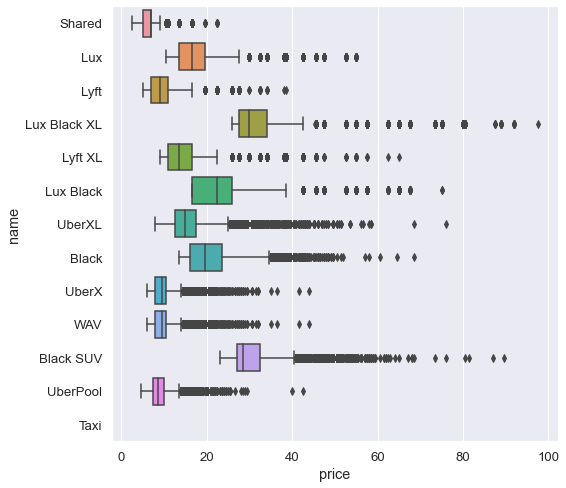

In [88]:
sns.boxplot(data=one_df , x='price' , y=Categorical_feature[5] )

#### Data Analysis with second sub data set 

In [89]:
two_df.head()

,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity
0,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68
1,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94
2,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75
3,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73
4,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70


In [90]:
two_df['price'] = df['price']
two_df.head()

<ipython-input-90-876156319315>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_df['price'] = df['price']


,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,price
0,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,5.0
1,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.0
2,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.0
3,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,26.0
4,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.0


In [91]:
two_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   surge_multiplier     693071 non-null  float64
 1   latitude             693071 non-null  float64
 2   longitude            693071 non-null  float64
 3   temperature          693071 non-null  float64
 4   apparentTemperature  693071 non-null  float64
 5   short_summary        693071 non-null  object 
 6   long_summary         693071 non-null  object 
 7   precipIntensity      693071 non-null  float64
 8   precipProbability    693071 non-null  float64
 9   humidity             693071 non-null  float64
 10  price                637976 non-null  float64
dtypes: float64(9), object(2)
memory usage: 58.2+ MB


Describe the hidden feature :
* surge_multiplier :   
      --There are times when so many people are requesting rides that there aren’t enough cars on the road to help take them all. Bad weather, rush hour, and special events, for instance, may cause unusually large numbers of people to want to request a ride with Uber all at the same time 
      -- In these cases of very high demand, prices may increase to help ensure that those who need a ride can get one. This system is called surge pricing, and it lets the Uber app continue to be a reliable choice.
   
* apparentTemperature :  The perceived temperature in degrees Fahrenheit derived from either a combination of temperature and wind (Wind Chill) or temperature and humidity (Heat Index) for the indicated hour

* precipIntensity : The rate of precipitation, expressed in inches or millimeters per hour. Also known as rainfall intensity

* precipProbability : The chance of precipitation or "Probability of Precipitation" (PoP) 

Data Analysis Question : 
* What is relation ship between surge multiplier and price ? 

* What is relation ship between apparentTemperature and price ?
* What is relation ship between temperature and price ?
* What is relation ship between humidity and price ?
* Analysis the long and short summary	?




###### Analysis the long and short summary	?


###### What is relation ship between surge multiplier and price ? 

In [92]:
two_df['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [93]:
two_df.groupby(by='surge_multiplier').count()['price']

surge_multiplier
1.00    617001
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: price, dtype: int64

 When the surge multiplier increase the price decrease 

###### what is the location is refer latitude and longitude ? 

In [94]:
from geopy.geocoders import Nominatim

In [95]:
geolocator = Nominatim(user_agent="Home")

In [96]:
#def address(x):
#    latitude = x['latitude']
#    longitude=x['longitude']
#    location =  geolocator.reverse(f"{latitude} , {longitude}")
#    return location.raw['address']['country']#
#     
#
#
#two_df['Address'] = two_df[['latitude' , 'longitude' ]].apply(address , axis=1)

In [97]:
two_df.head()

,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,price
0,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,5.0
1,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.0
2,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.0
3,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,26.0
4,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.0


In [98]:
#two_df.drop('Address' , axis=1 , inplace=True)

###### What is relation ship between apparentTemperature and price ?


In [99]:
two_df[['apparentTemperature' , 'price']].describe()

,apparentTemperature,price
count,693071.000000,637976.000000
mean,35.881222,16.545125
std,7.918707,9.324359
min,12.130000,2.500000
25%,31.910000,9.000000
50%,35.900000,13.500000
75%,40.080000,22.500000
max,57.220000,97.500000


this No relationship appearance

In [100]:
two_df['temperature'].value_counts()

37.92    6552
39.41    5616
40.13    5616
38.42    5460
39.35    5304
         ... 
41.52     420
35.22     372
41.59     252
29.35     156
34.51     156
Name: temperature, Length: 308, dtype: int64

In [101]:
two_df[['temperature' , 'price']].describe()

,temperature,price
count,693071.000000,637976.000000
mean,39.584388,16.545125
std,6.726084,9.324359
min,18.910000,2.500000
25%,36.450000,9.000000
50%,40.490000,13.500000
75%,43.580000,22.500000
max,57.220000,97.500000


###### What is relation ship between humidity and price ?


In [102]:
two_df['humidity'].value_counts()

0.69    36972
0.91    36543
0.70    36453
0.92    30000
0.71    28073
0.64    26520
0.93    25884
0.94    22776
0.65    21683
0.60    19499
0.88    19260
0.73    18720
0.57    18564
0.89    16656
0.72    16068
0.63    14040
0.79    13320
0.95    13104
0.85    13068
0.90    12900
0.61    12480
0.68    12480
0.58    11935
0.78    11856
0.81    11388
0.66    11232
0.67    11232
0.96    11232
0.62    11232
0.51    11232
0.54    11218
0.83    10608
0.50     9360
0.74     9360
0.77     9360
0.52     9339
0.86     8976
0.75     8268
0.80     7488
0.84     7296
0.55     6084
0.56     5772
0.82     5616
0.87     5616
0.46     5602
0.59     5460
0.53     3744
0.44     3134
0.41     1872
0.40     1872
0.38      624
Name: humidity, dtype: int64

In [103]:
two_df[['humidity' , 'price']].describe()

,humidity,price
count,693071.000000,637976.000000
mean,0.741119,16.545125
std,0.138595,9.324359
min,0.380000,2.500000
25%,0.640000,9.000000
50%,0.710000,13.500000
75%,0.880000,22.500000
max,0.960000,97.500000


###### Analysis the long and short summary	?


In [104]:
two_df['long_summary'].value_counts()

 Mostly cloudy throughout the day.                      202340
 Partly cloudy throughout the day.                      145279
 Light rain in the morning.                             102485
 Rain throughout the day.                                54288
 Light rain in the morning and overnight.                50544
 Rain until morning, starting again in the evening.      47931
 Foggy in the morning.                                   44772
 Light rain until evening.                               35568
 Overcast throughout the day.                             7488
 Possible drizzle in the morning.                         1872
 Rain in the morning and afternoon.                        504
Name: long_summary, dtype: int64

In [105]:
two_df['short_summary'].value_counts()

 Overcast             218895
 Mostly Cloudy        146210
 Partly Cloudy        127224
 Clear                 87126
 Light Rain            54912
 Rain                  23712
 Possible Drizzle      18636
 Foggy                  9060
 Drizzle                7296
Name: short_summary, dtype: int64

##### Data visualization Numerical Univariate Plots

In [106]:
two_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   surge_multiplier     693071 non-null  float64
 1   latitude             693071 non-null  float64
 2   longitude            693071 non-null  float64
 3   temperature          693071 non-null  float64
 4   apparentTemperature  693071 non-null  float64
 5   short_summary        693071 non-null  object 
 6   long_summary         693071 non-null  object 
 7   precipIntensity      693071 non-null  float64
 8   precipProbability    693071 non-null  float64
 9   humidity             693071 non-null  float64
 10  price                637976 non-null  float64
dtypes: float64(9), object(2)
memory usage: 58.2+ MB


In [107]:
numarical = ['surge_multiplier','temperature' , 'apparentTemperature' , 'precipIntensity' , 'precipProbability' , 'humidity']
categorical = ['short_summary' , 'long_summary']

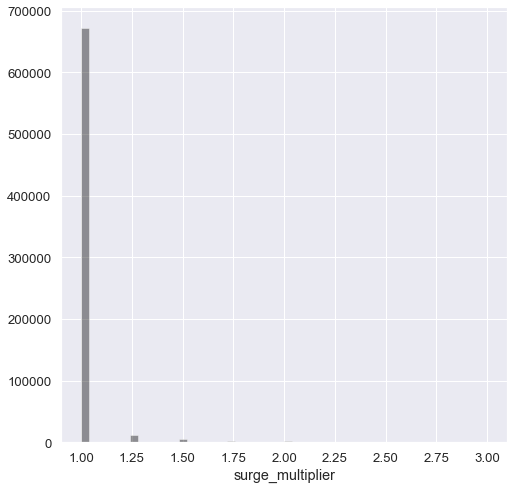

In [108]:
sns.distplot(two_df[numarical[0]] , kde=False , color='black' )

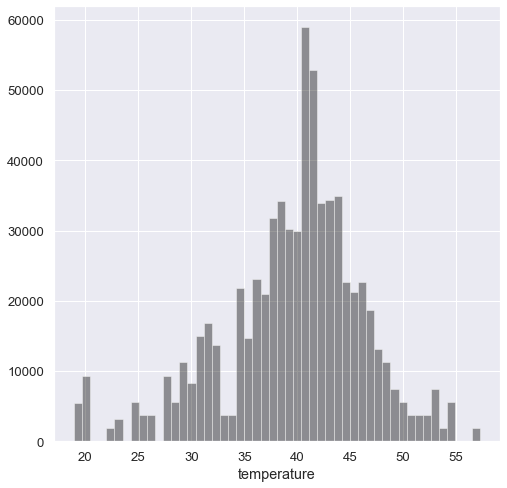

In [109]:
sns.distplot(two_df[numarical[1]] , kde=False , color='black' )

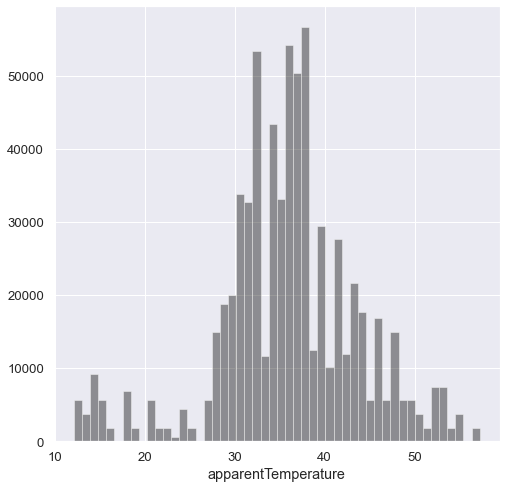

In [110]:
sns.distplot(two_df[numarical[2]] , kde=False , color='black' )

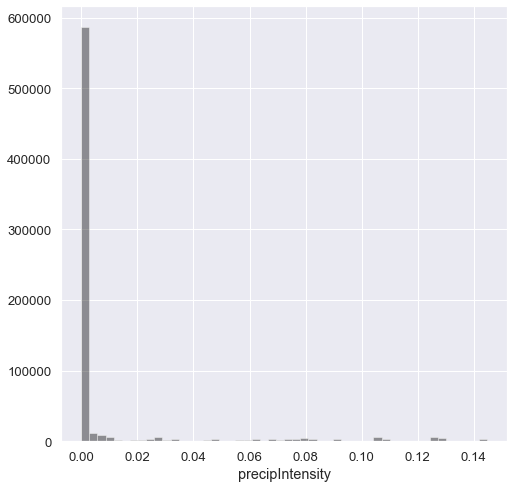

In [111]:
sns.distplot(two_df[numarical[3]] , kde=False , color='black' )

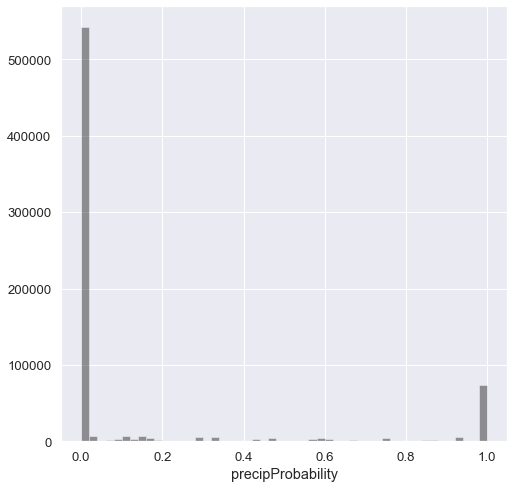

In [112]:
sns.distplot(two_df[numarical[4]] , kde=False , color='black' )

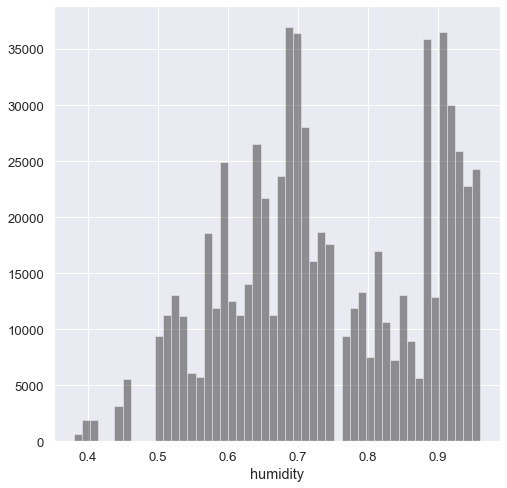

In [113]:
sns.distplot(two_df[numarical[5]] , kde=False , color='black' )

##### Data visualization Numerical Bivariate Plots

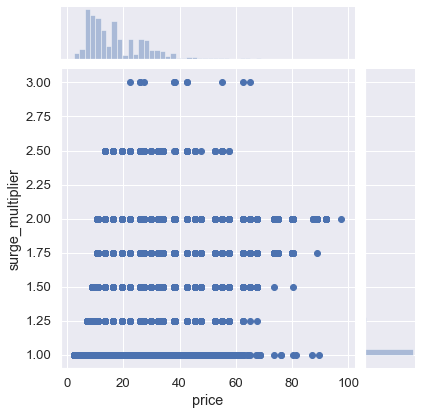

In [114]:
sns.jointplot(data = two_df , x='price' , y=numarical[0] )

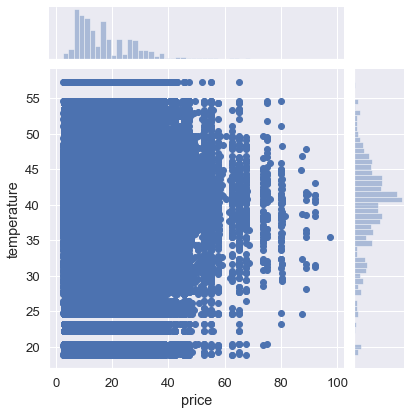

In [115]:
sns.jointplot(data = two_df , x='price' , y=numarical[1] )

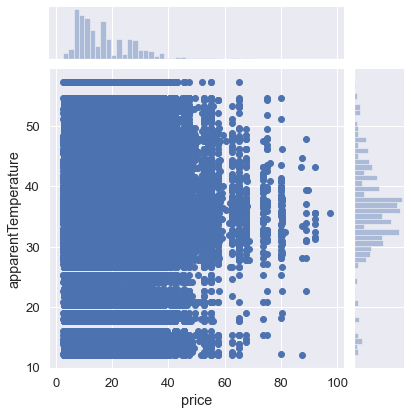

In [116]:
sns.jointplot(data = two_df , x='price' , y=numarical[2] )

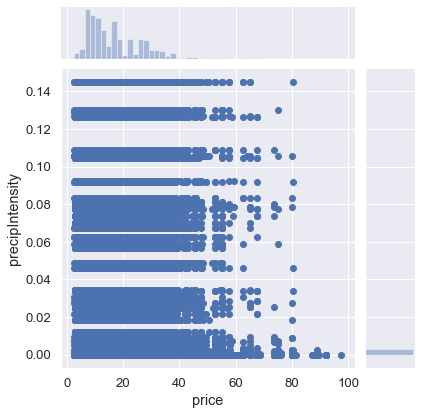

In [117]:
sns.jointplot(data = two_df , x='price' , y=numarical[3] )

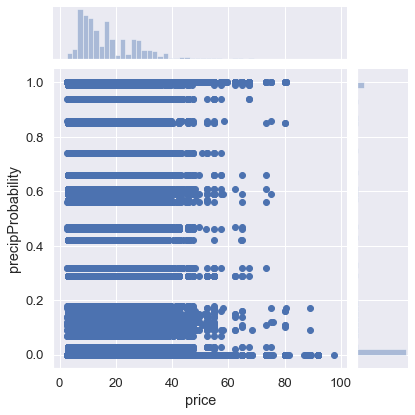

In [118]:
sns.jointplot(data = two_df , x='price' , y=numarical[4] )

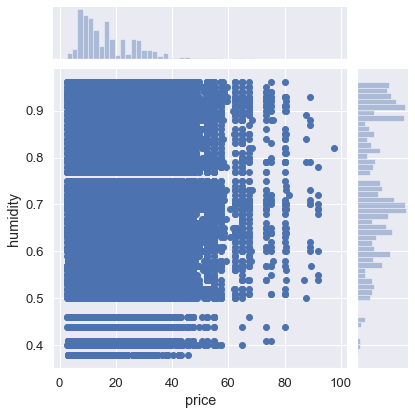

In [119]:
sns.jointplot(data = two_df , x='price' , y=numarical[5] )

##### Data visualization Categorical Univariate 

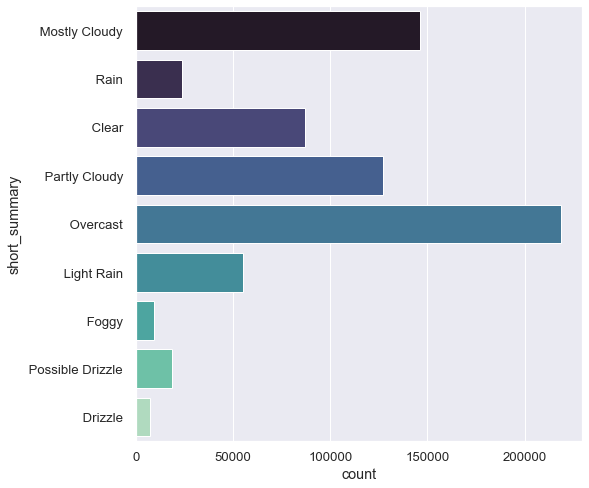

In [120]:
sns.countplot(y=two_df[categorical[0]] , palette='mako')

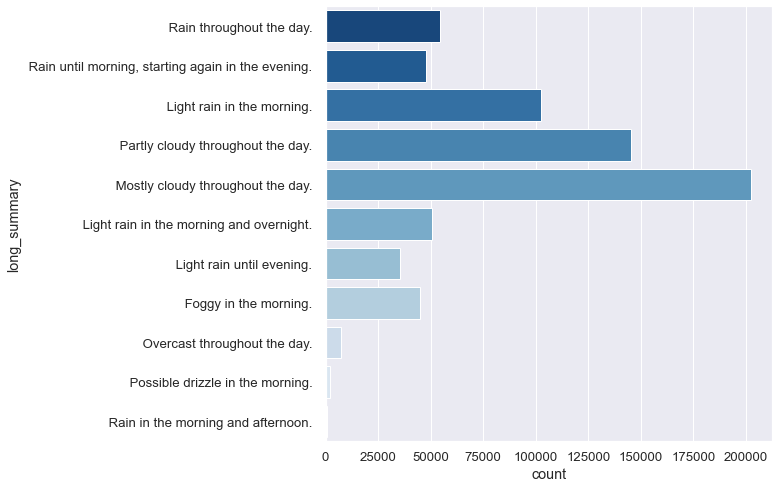

In [121]:
sns.countplot(y=two_df[categorical[1]] , palette='Blues_r')

##### Data visualization Categorical Bivariate 

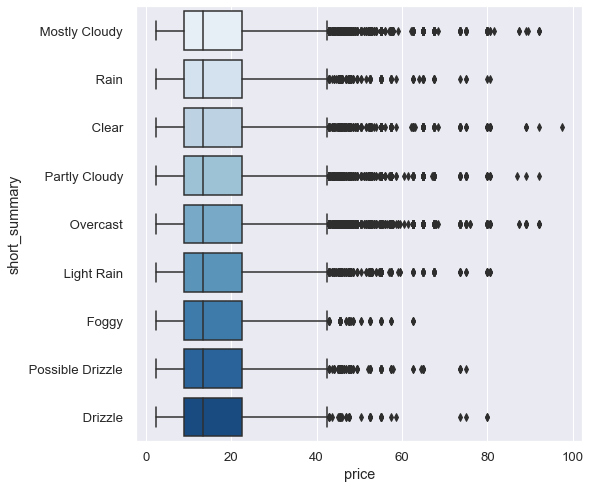

In [122]:
sns.boxplot(data=two_df , x= 'price' , y=categorical[0] , palette='Blues')

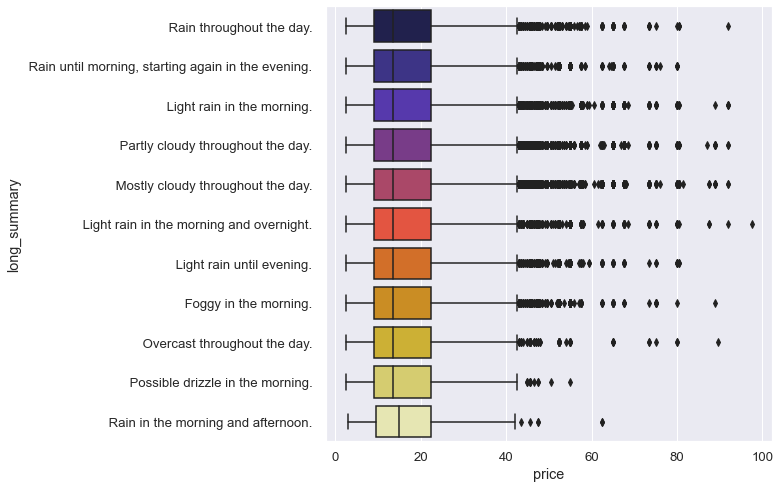

In [123]:
sns.boxplot(data=two_df , x= 'price' , y=categorical[1] , palette='CMRmap')

### Third sub dataset

In [124]:
three_df.head()

,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh
0,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95
1,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92
2,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12
3,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53
4,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75


In [125]:
three_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   windSpeed                693071 non-null  float64
 1   windGust                 693071 non-null  float64
 2   windGustTime             693071 non-null  int64  
 3   visibility               693071 non-null  float64
 4   temperatureHigh          693071 non-null  float64
 5   temperatureHighTime      693071 non-null  int64  
 6   temperatureLow           693071 non-null  float64
 7   temperatureLowTime       693071 non-null  int64  
 8   apparentTemperatureHigh  693071 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 47.6 MB


In [126]:
three_df['price'] = df['price']

<ipython-input-126-010b9b5edb02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_df['price'] = df['price']


In [127]:
three_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   windSpeed                693071 non-null  float64
 1   windGust                 693071 non-null  float64
 2   windGustTime             693071 non-null  int64  
 3   visibility               693071 non-null  float64
 4   temperatureHigh          693071 non-null  float64
 5   temperatureHighTime      693071 non-null  int64  
 6   temperatureLow           693071 non-null  float64
 7   temperatureLowTime       693071 non-null  int64  
 8   apparentTemperatureHigh  693071 non-null  float64
 9   price                    637976 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 52.9 MB


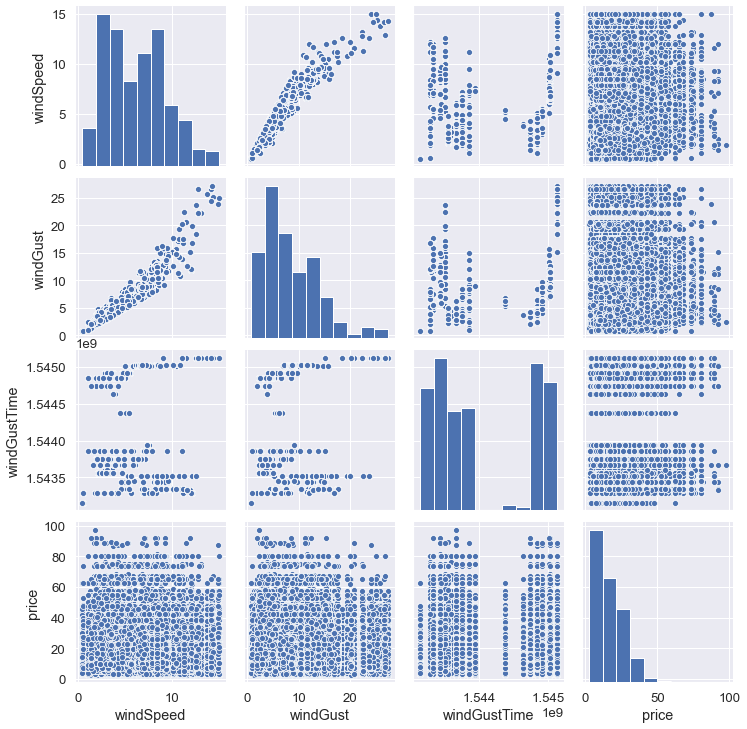

In [128]:
sns.pairplot(data=df , vars=['windSpeed' , 'windGust' , 'windGustTime' , 'price'])

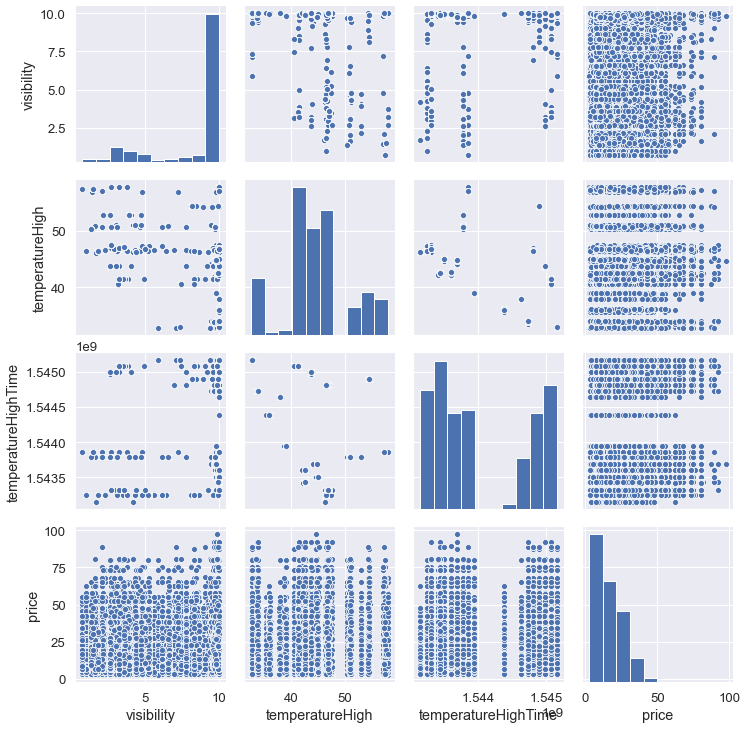

In [129]:
sns.pairplot(data=df , vars=['visibility' , 'temperatureHigh' , 'temperatureHighTime' , 'price'])

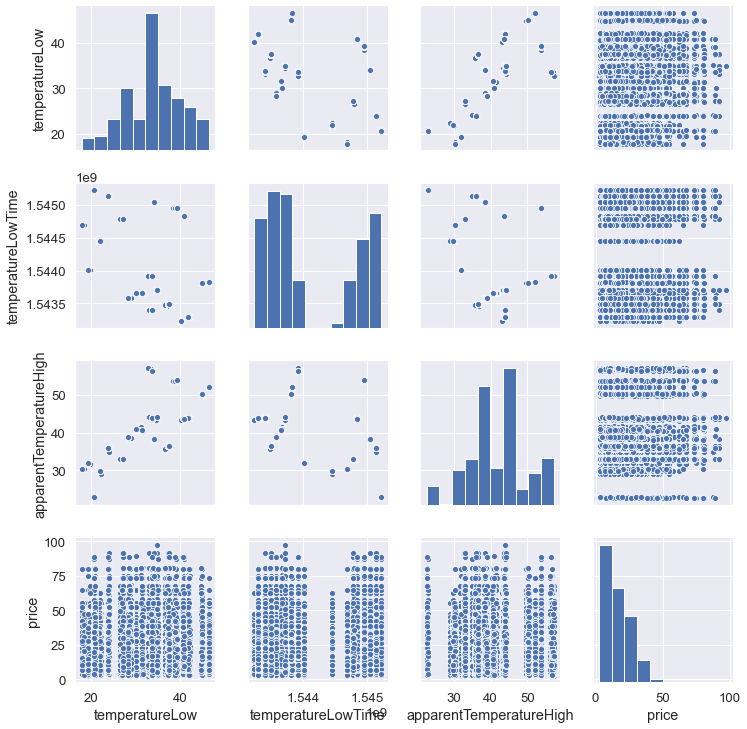

In [130]:
sns.pairplot(data=df , vars=['temperatureLow' , 'temperatureLowTime' , 'apparentTemperatureHigh' , 'price'])

### fourth sub dataset

In [131]:
four_df.head()

,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex
0,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0
1,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0
2,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0
3,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0
4,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0


In [132]:
four_df['price'] = df['price']

<ipython-input-132-6737d0cdff6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_df['price'] = df['price']


In [133]:
four_df.head()

,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,price
0,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,5.0
1,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,11.0
2,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,7.0
3,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,26.0
4,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,9.0


In [134]:
four_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   apparentTemperatureHighTime  693071 non-null  int64  
 1   apparentTemperatureLow       693071 non-null  float64
 2   apparentTemperatureLowTime   693071 non-null  int64  
 3   icon                         693071 non-null  object 
 4   dewPoint                     693071 non-null  float64
 5   pressure                     693071 non-null  float64
 6   windBearing                  693071 non-null  int64  
 7   cloudCover                   693071 non-null  float64
 8   uvIndex                      693071 non-null  int64  
 9   price                        637976 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 52.9+ MB


In [135]:
four_df.describe()

,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,price
count,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,637976.000000
mean,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,16.545125
std,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,9.324359
min,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,2.500000
25%,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,9.000000
50%,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,13.500000
75%,1.544818e+09,35.320000,1.544836e+09,38.120000,1021.860000,303.000000,1.000000,0.000000,22.500000
max,1.545160e+09,47.250000,1.545199e+09,50.670000,1035.550000,356.000000,1.000000,2.000000,97.500000


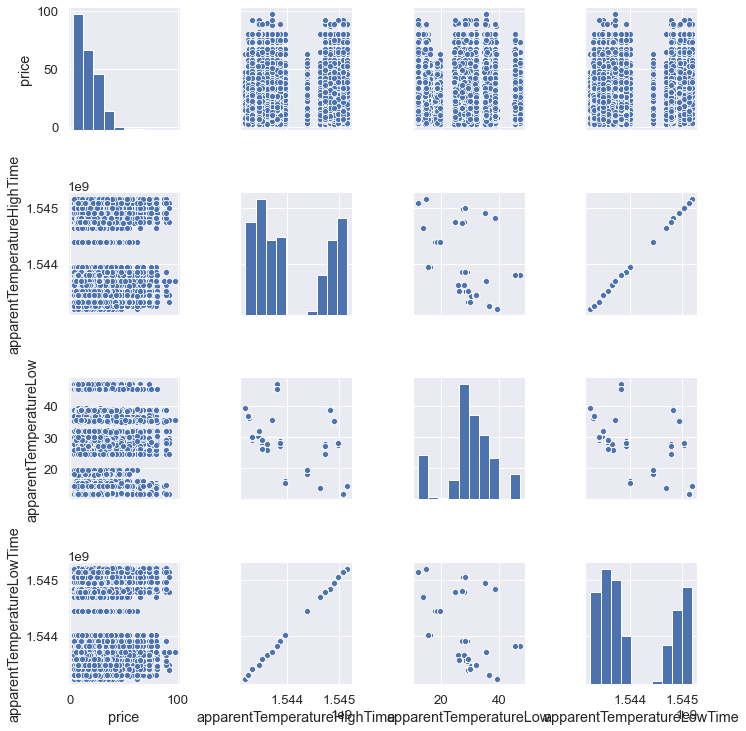

In [136]:
sns.pairplot(data=four_df , vars=['price','apparentTemperatureHighTime' , 'apparentTemperatureLow' , 'apparentTemperatureLowTime'])

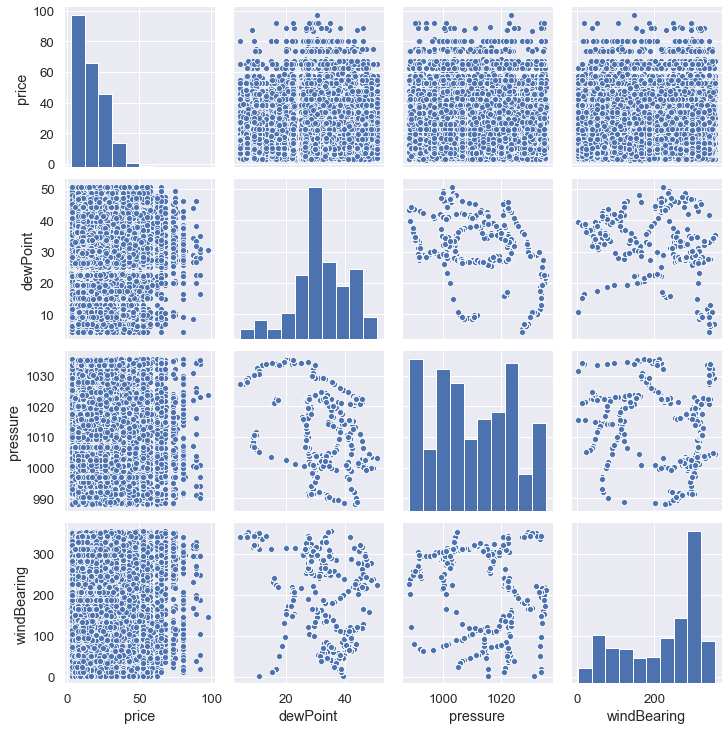

In [137]:
sns.pairplot(data=four_df , vars=['price','dewPoint' , 'pressure' , 'windBearing'])

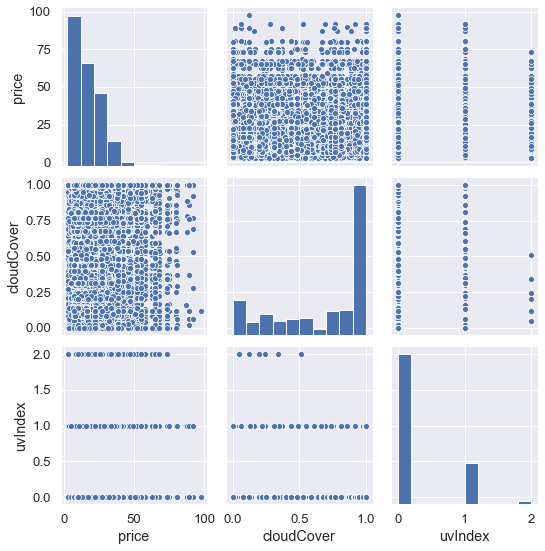

In [138]:
sns.pairplot(data=four_df , vars=['price','cloudCover' , 'uvIndex' ])

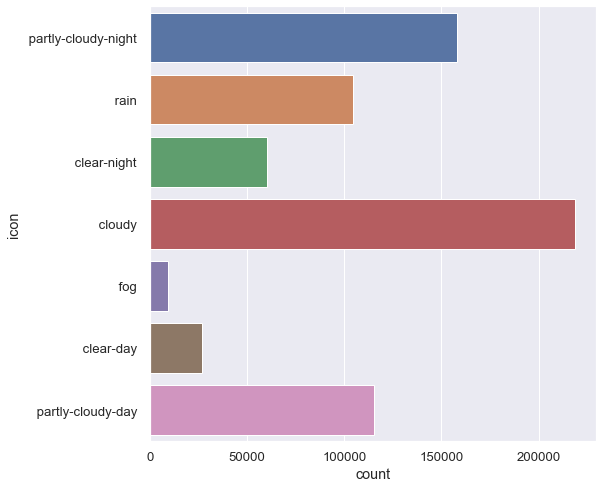

In [139]:
sns.countplot(y=four_df['icon'])

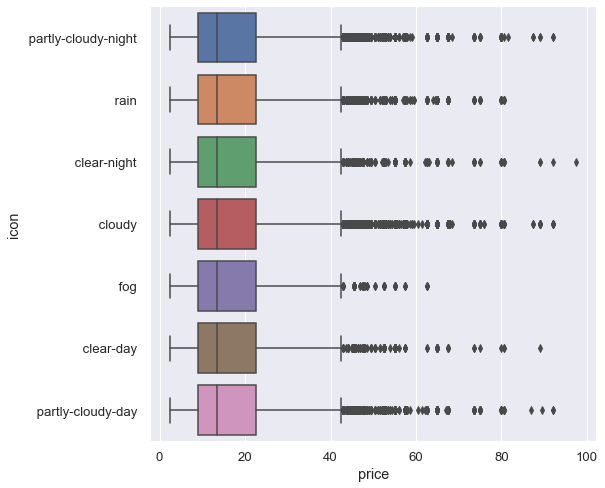

In [140]:
sns.boxplot(data=four_df , y='icon' , x='price')

#### Fifth sub dataset

In [141]:
five_df.head()

,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax
0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68
1,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30
2,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55
3,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03
4,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18


In [142]:
five_df['price'] = df['price']

<ipython-input-142-dccab45352a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_df['price'] = df['price']


In [143]:
five_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   visibility.1        693071 non-null  float64
 1   ozone               693071 non-null  float64
 2   sunriseTime         693071 non-null  int64  
 3   sunsetTime          693071 non-null  int64  
 4   moonPhase           693071 non-null  float64
 5   precipIntensityMax  693071 non-null  float64
 6   uvIndexTime         693071 non-null  int64  
 7   temperatureMin      693071 non-null  float64
 8   temperatureMinTime  693071 non-null  int64  
 9   temperatureMax      693071 non-null  float64
 10  price               637976 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 58.2 MB


In [144]:
five_df.describe()

,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,price
count,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,637976.000000
mean,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,16.545125
std,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,9.324359
min,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,2.500000
25%,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,9.000000
50%,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,13.500000
75%,9.996000,331.800000,1.544789e+09,1.544822e+09,0.790000,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,22.500000
max,10.000000,378.900000,1.545135e+09,1.545168e+09,0.930000,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,97.500000


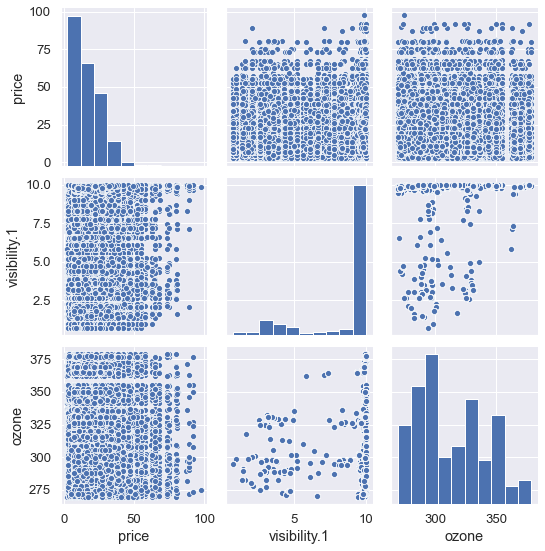

In [145]:
sns.pairplot(data=five_df , vars=['price','visibility.1' , 'ozone' ])

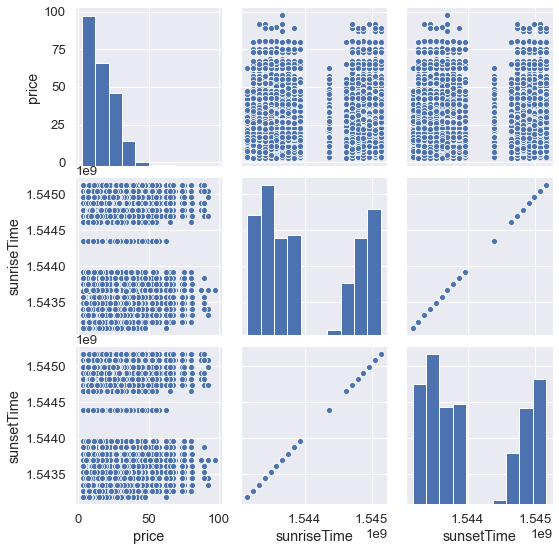

In [146]:
sns.pairplot(data=five_df , vars=['price','sunriseTime' , 'sunsetTime' ])

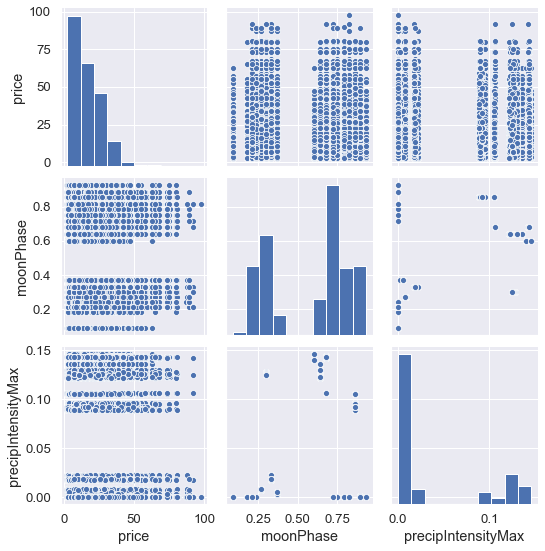

In [147]:
sns.pairplot(data=five_df , vars=['price','moonPhase' , 'precipIntensityMax' ])

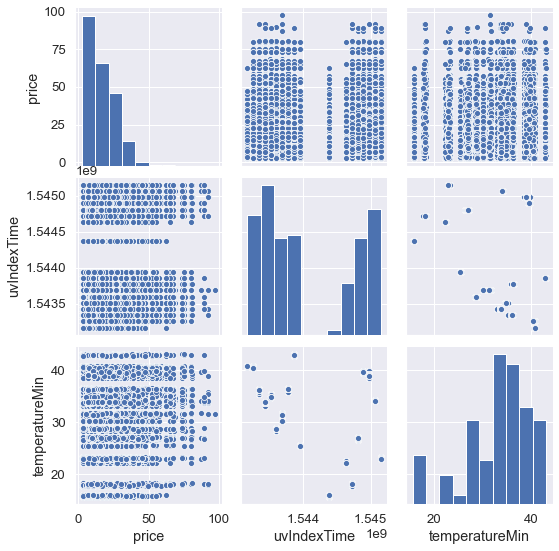

In [148]:
sns.pairplot(data=five_df , vars=['price','uvIndexTime' , 'temperatureMin' ])

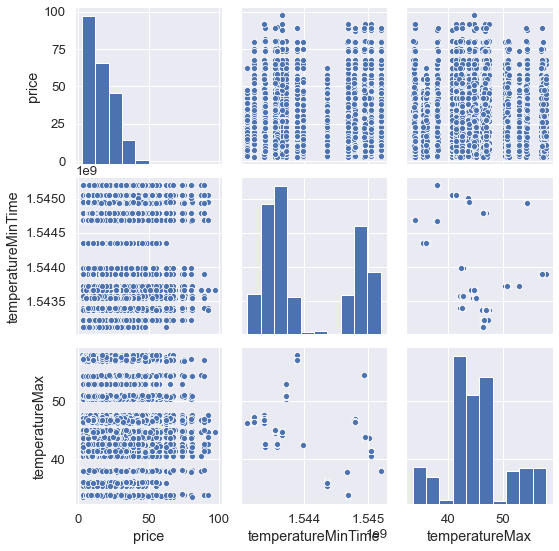

In [149]:
sns.pairplot(data=five_df , vars=['price','temperatureMinTime' , 'temperatureMax' ])

#### Final Sub dataset

In [150]:
six_df.head()

,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1544968800,33.73,1545012000,38.07,1544958000
1,1543251600,36.20,1543291200,43.92,1543251600
2,1543320000,31.04,1543377600,44.12,1543320000
3,1543510800,30.30,1543550400,38.53,1543510800
4,1543420800,29.11,1543392000,35.75,1543420800


In [151]:
six_df['price'] = df['price']

<ipython-input-151-635f3936145e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  six_df['price'] = df['price']


In [152]:
six_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   temperatureMaxTime          693071 non-null  int64  
 1   apparentTemperatureMin      693071 non-null  float64
 2   apparentTemperatureMinTime  693071 non-null  int64  
 3   apparentTemperatureMax      693071 non-null  float64
 4   apparentTemperatureMaxTime  693071 non-null  int64  
 5   price                       637976 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 31.7 MB


In [153]:
six_df.describe()

,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price
count,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,637976.000000
mean,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09,16.545125
std,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05,9.324359
min,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09,2.500000
25%,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09,9.000000
50%,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09,13.500000
75%,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09,22.500000
max,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09,97.500000


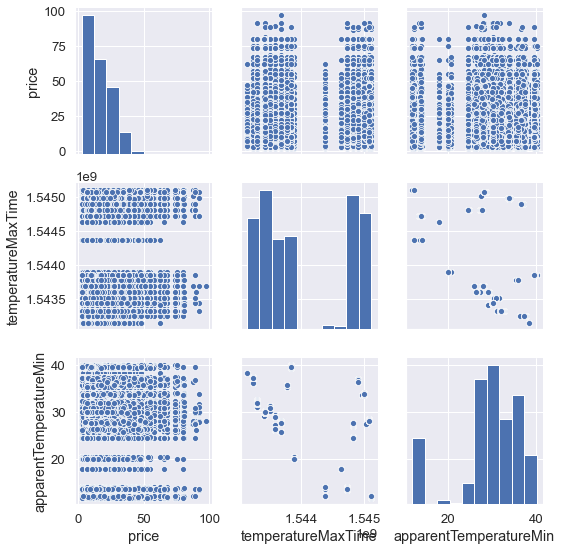

In [154]:
sns.pairplot(data=six_df , vars=['price' , 'temperatureMaxTime' , 'apparentTemperatureMin'])

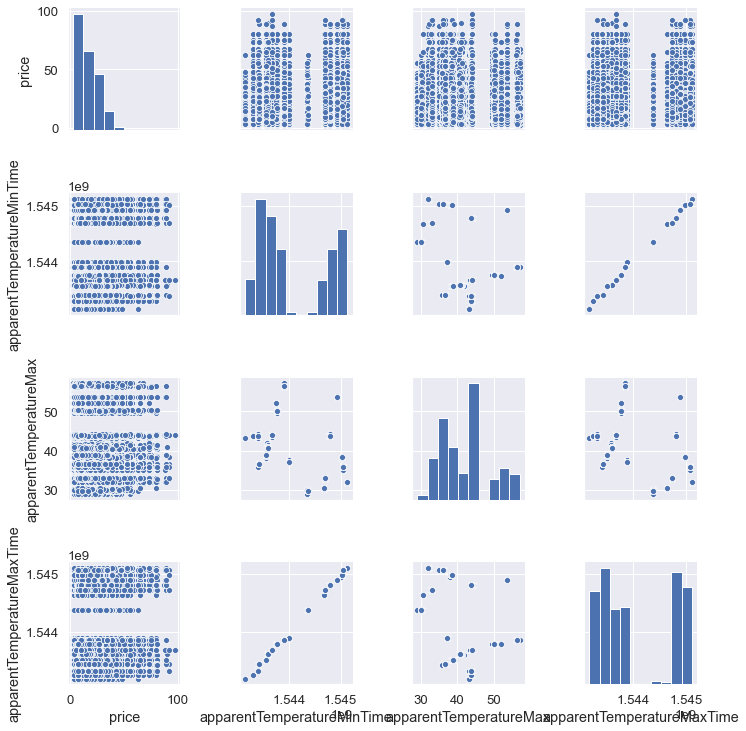

In [155]:
sns.pairplot(data=six_df , vars=['price' , 'apparentTemperatureMinTime' , 'apparentTemperatureMax' , 'apparentTemperatureMaxTime'])

## Feature Transformation

#### Working With Mission Values

In [156]:
df.isnull().sum() 

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [157]:
(df.isnull().sum() * 100) / len(df)

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


In [158]:
from sklearn.impute import SimpleImputer

In [159]:
imputer = SimpleImputer(strategy='median')

In [160]:
df['price'] = imputer.fit_transform(df[['price']])

In [161]:
df.isnull().sum() 

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

#### Working With Categorical Feature

In [162]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        693071 non-null  float64
 13 

In [164]:
categorical_feature_df = ['timezone','source','destination' ,'cab_type','product_id','name',
                         'short_summary','long_summary','icon']
categorical_feature_df_2=['source' , 'destination' , 'product_id' , 'name'
, 'icon' ,'cab_type']

### Drop useless feature 

In [165]:
df = df[['month' , 'source' , 'destination' , 'product_id' , 'name' , 'surge_multiplier' , 'icon' , 'uvIndex' ,'cab_type','distance', 'price'  ]]

In [166]:
df = pd.get_dummies(df , columns=categorical_feature_df_2 ,drop_first=True)

In [167]:
df.head()

,month,surge_multiplier,uvIndex,distance,price,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,...,name_UberX,name_UberXL,name_WAV,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,cab_type_Uber
0,12,1.0,0,0.44,5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,11,1.0,0,0.44,11.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,11,1.0,0,0.44,7.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,11,1.0,0,0.44,26.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,11,1.0,0,0.44,9.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### Detect Outlier 

In [168]:
from datasist.structdata import detect_outliers

In [169]:
out = detect_outliers(df , 0 , df.columns)
len(out)

693071

In [170]:
# for col in df.columns:
#     out=detect_outliers(df , 0,[col])
#     median=df[col].median()
#     df[col].iloc[out] = median
# 

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x = df.drop('price' , axis=1)
y = df['price']

In [173]:
x.shape

(693071, 57)

In [174]:
y.shape

(693071,)

In [175]:
x.head()

,month,surge_multiplier,uvIndex,distance,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,...,name_UberX,name_UberXL,name_WAV,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,cab_type_Uber
0,12,1.0,0,0.44,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,11,1.0,0,0.44,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,11,1.0,0,0.44,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,11,1.0,0,0.44,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,11,1.0,0,0.44,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [176]:
y.head()

0     5.0
1    11.0
2     7.0
3    26.0
4     9.0
Name: price, dtype: float64

In [177]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [178]:
x_train.shape

(554456, 57)

In [179]:
x_test.shape

(138615, 57)

In [180]:
y_train.shape

(554456,)

In [181]:
y_test.shape

(138615,)

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
scaler =StandardScaler()

In [184]:
scaler.fit(x_train)

StandardScaler()

In [185]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [187]:
reg = LinearRegression()
reg = reg.fit(x_train, y_train)

print(f'Training Score: {reg.score(x_train, y_train)}')
print(f'Test Score: {reg.score(x_test, y_test)}') 


Training Score: 0.9192090530299375
Test Score: -1.0667565193161056e+19


In [188]:
xgb =  XGBRegressor()
#Fitting training data
xgb = xgb.fit(x_train, y_train)

print(f'Training Score: {xgb.score(x_train, y_train)}')
print(f'Test Score: {xgb.score(x_test, y_test)}') 


Training Score: 0.9699414610409198
Test Score: 0.9693444988384755


In [189]:
y_pred = xgb.predict(x_test)
y_pred

array([13.838428, 39.640224, 19.281233, ..., 15.946532, 18.02059 ,
       15.86016 ], dtype=float32)

In [190]:
y_test

64006     13.5
597671    34.5
521241    17.5
484125     7.0
175005     9.5
          ... 
585011    10.5
160193     3.0
525188    16.5
687150    19.5
76983     16.0
Name: price, Length: 138615, dtype: float64

In [192]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [193]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.568910819343483

In [194]:
r2_score(y_test, y_pred)

0.9693444988384755

In [195]:
mean_absolute_error(y_test , y_pred)

0.9898353315284663

In [196]:
x.columns

Index(['month', 'surge_multiplier', 'uvIndex', 'distance',
       'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End',
       'product_id_6c84fd89-3f11-4782-9b50-97c468b19529',
       'product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546',
       'product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       'product_id_8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a',
       'product_id_997acbb5-e102-41e1-b155